In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [42]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [43]:
np.random.seed(42)

# Get the number of samples
num_samples = len(x)

# Shuffle indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Calculate the index to split the data into training and testing sets
split_index = int(0.8 * num_samples)

# Split the data
x_train, x_test = x[indices[:split_index]], x[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

# Checking the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (142, 13)
y_train shape: (142,)
x_test shape: (36, 13)
y_test shape: (36,)


In [44]:
mean_values = np.mean(x_train, axis=0)
std_dev_values = np.std(x_train, axis=0)
x_train_standardized = (x_train - mean_values) / std_dev_values
x_test_standardized = (x_test - mean_values) / std_dev_values
print("x_train_standardized shape:", x_train_standardized.shape)
print("x_test_standardized shape:", x_test_standardized.shape)


x_train_standardized shape: (142, 13)
x_test_standardized shape: (36, 13)


## PRINCIPAL COMPONENT ANALYSIS (PCA)

In [61]:
class CustomPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.selected_components = None

    def fit(self, X):
        # Step 1: Compute the covariance matrix
        covariance_mat = np.cov(X, rowvar=False)

        # Step 2: Compute eigenvalues and eigenvectors
        eigen_val, eigen_vec = np.linalg.eig(covariance_mat)

        # Step 3: Sort eigenvalues and eigenvectors
        sort_indices = eigen_val.argsort()[::-1]
        eigen_val = eigen_val[sort_indices]
        eigen_vec = eigen_vec[:, sort_indices]

        # Step 4: Choose the top k eigenvectors
        if self.n_components is not None:
            self.selected_components = eigen_vec[:, :self.n_components]
        else:
            self.selected_components = eigen_vec

    def transform(self, X):
        if self.selected_components is None:
            raise ValueError("Fit the model before transforming the data.")
        return X.dot(self.selected_components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [62]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [67]:
pca = CustomPCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_standardized)
x_test_pca = pca.transform(x_test_standardized)
print("Shape of x_train_pca:", x_train_pca.shape)

Shape of x_train_pca: (142, 2)


In [68]:
x_test_pca.shape,x_train_pca.shape

((36, 2), (142, 2))

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train_pca,y_train)

LogisticRegression(random_state=42)

In [70]:
print("Number of features after LDA:", x_test_pca.shape[1])

Number of features after LDA: 2


In [71]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test_pca)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy(y_test,y_pred)

[[11  0  0]
 [ 1 13  0]
 [ 0  2  9]]


0.9166666666666666

### Training set 

In [ ]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('PCA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set

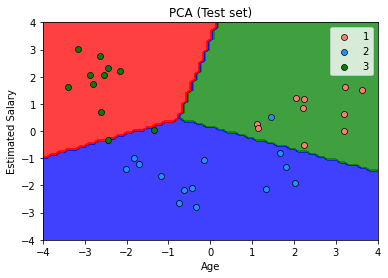

In [74]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = lr.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('PCA (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()